In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **CARDIOTOCOGRAPHIC DATASET**

---
# 01. Data Cleaning and Prepration
---




> ### Loading Dataset






In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/Cardiotocographic.csv')

In [ ]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
data.shape

(2126, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB



> ### Handling Missing Values


In [ ]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [ ]:
data.shape

(2105, 14)

In [ ]:
data[data.duplicated()].shape

(2, 14)

In [ ]:
data[data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data['Tendency'].value_counts()

Tendency
 0.000000    1035
 1.000000     804
-1.000000     149
-3.000000       5
 3.000000       4
             ... 
-0.018994       1
-0.019886       1
-0.026640       1
-0.009974       1
 1.002932       1
Name: count, Length: 111, dtype: int64


### Checking outliers


In [ ]:
#sns.pairplot(data)

In [ ]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,133.342023,0.003203,0.009973,0.004391,0.001894,0.000003,0.000175,47.013569,1.360968,10.363493,8.280546,70.461052,0.316672,1.304797
std,11.268266,0.004325,0.067902,0.003350,0.003349,0.000142,0.000840,18.846186,1.173620,21.289827,7.774969,42.939806,0.645855,0.644857
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.000000
75%,140.000000,0.005650,0.002559,0.006543,0.003295,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
data = data[(data['NSP'] >= 0) & (data['NSP'] <= 3)]
data['NSP'] = data['NSP'].round()
data.shape

(2086, 14)

In [ ]:
data['NSP'].value_counts()

NSP
1.0    1628
2.0     293
3.0     165
Name: count, dtype: int64

---
# 02. Statistical Summary
---

In [ ]:
data_summa = data.describe()

In [ ]:
data_summa

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,133.360239,0.003204,0.010006,0.004388,0.001888,0.000002,0.000174,46.976352,1.359596,10.301739,8.330224,70.391533,0.316865,1.298658
std,11.290575,0.004329,0.068164,0.003346,0.003316,0.000140,0.000840,18.865593,1.171898,21.210678,7.678879,42.601493,0.645699,0.606494
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.078520,0.005646,0.002567,0.006547,0.003276,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,3.000000


In [ ]:
iqr = (data_summa.iloc[6]-data_summa.iloc[4])

In [ ]:
iqr

LB          14.078520
AC           0.005646
FM           0.002567
UC           0.004709
DL           0.003276
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

In [ ]:
iqr = pd.DataFrame(iqr)

In [ ]:
iqr_t = iqr.T

In [ ]:
iqr_t.index = ['IQR']
iqr_t

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
IQR,14.07852,0.005646,0.002567,0.004709,0.003276,0.0,0.0,29.0,1.0,11.0,6.3,63.0,1.0,0.0


In [ ]:
data_summa = pd.concat([data_summa,iqr_t])

In [ ]:
data_summa

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,133.360239,0.003204,0.010006,0.004388,0.001888,0.000002,0.000174,46.976352,1.359596,10.301739,8.330224,70.391533,0.316865,1.298658
std,11.290575,0.004329,0.068164,0.003346,0.003316,0.000140,0.000840,18.865593,1.171898,21.210678,7.678879,42.601493,0.645699,0.606494
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.078520,0.005646,0.002567,0.006547,0.003276,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,3.000000
IQR,14.078520,0.005646,0.002567,0.004709,0.003276,0.000000,0.000000,29.000000,1.000000,11.000000,6.300000,63.000000,1.000000,0.000000


In [ ]:
ll = data_summa.iloc[4] - 1.5*data_summa.iloc[8]
ll = pd.DataFrame(ll).T
ll.index = ['Lower Limit']
data_summa = pd.concat([data_summa,ll])

In [ ]:
ul = data_summa.iloc[6] + 1.5*data_summa.iloc[8]
ul = pd.DataFrame(ul).T
ul.index=['Upper Limit']
data_summa = pd.concat([data_summa,ul])

In [ ]:
data_summa

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,133.360239,0.003204,0.010006,0.004388,0.001888,0.000002,0.000174,46.976352,1.359596,10.301739,8.330224,70.391533,0.316865,1.298658
std,11.290575,0.004329,0.068164,0.003346,0.003316,0.000140,0.000840,18.865593,1.171898,21.210678,7.678879,42.601493,0.645699,0.606494
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.078520,0.005646,0.002567,0.006547,0.003276,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,3.000000
IQR,14.078520,0.005646,0.002567,0.004709,0.003276,0.000000,0.000000,29.000000,1.000000,11.000000,6.300000,63.000000,1.000000,0.000000
Lower Limit,104.882220,-0.008469,-0.003850,-0.005225,-0.004914,0.000000,0.000000,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.000000


In [ ]:
data.shape

(2086, 14)

* Total 2103 Rows of Fetal Heart Health Data
* From Central Tendencies we can infer that the data lies in very narrow range
  * 10 out of 14 Columns have mean value greater than 10
* Similarly we can see that most of the columns have a very narrow IQR.
    * 9 Columns have IQR smaller than 1
    * 4 Columns have IQR smaller than 30
* The baseline fetal heart rate (LB) tends to cluster around 133 beats per minute.
* The columns consistently has median close to zero.


---
# 03. Data Vizualization
---

<Axes: xlabel='FM', ylabel='Count'>

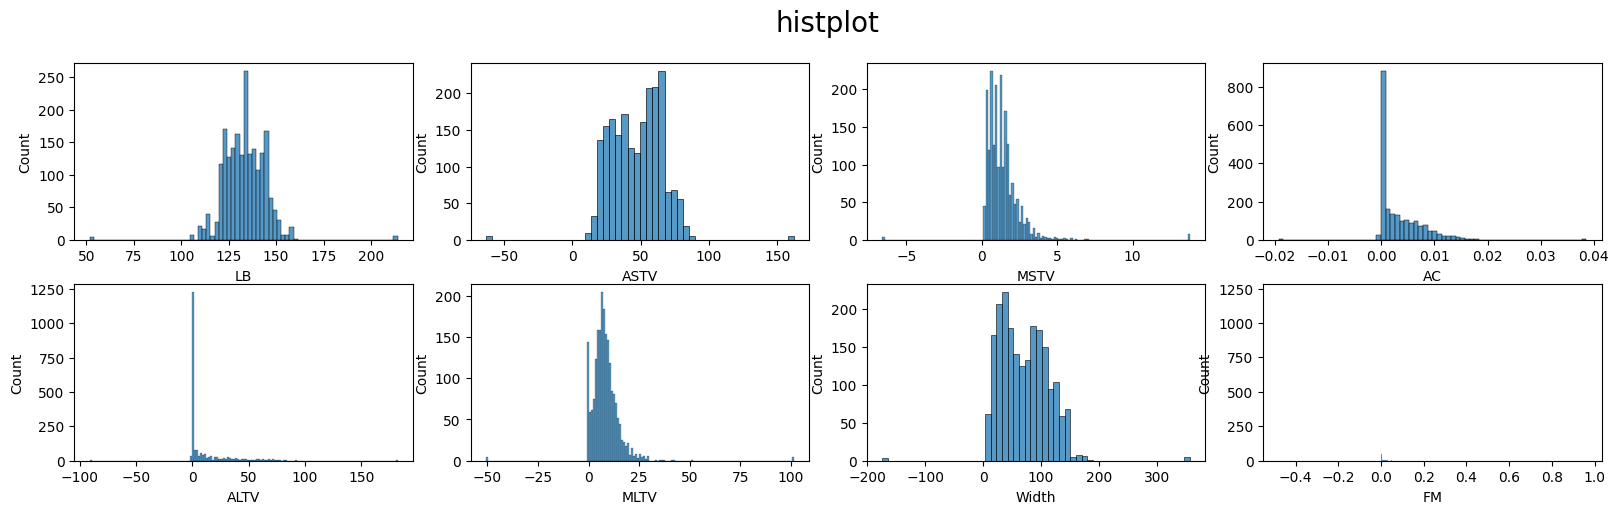

In [ ]:
fig, axs=plt.subplots(2,4,figsize=(16,5))
plt.suptitle('histplot',size=20)
plt.tight_layout()
sns.histplot(data['LB'],ax=axs[0,0])
sns.histplot(data['ASTV'],ax=axs[0,1])
sns.histplot(data['MSTV'],ax=axs[0,2])
sns.histplot(data['ALTV'],ax=axs[1,0])
sns.histplot(data['MLTV'],ax=axs[1,1])
sns.histplot(data['Width'],ax=axs[1,2])
sns.histplot(data['AC'],ax=axs[0,3])
sns.histplot(data['FM'],ax=axs[1,3])

<Axes: xlabel='NSP', ylabel='Count'>

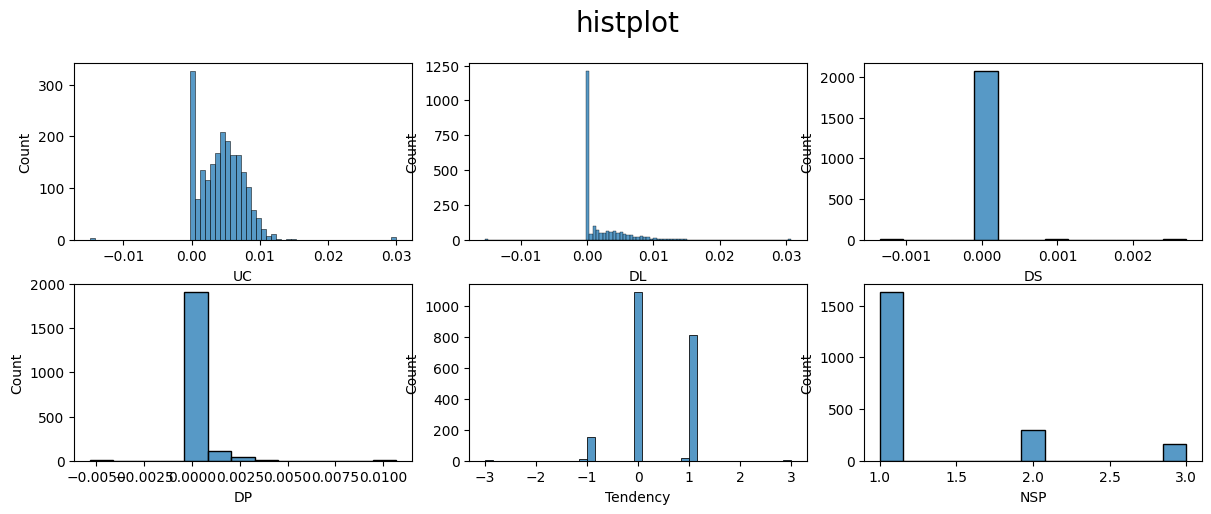

In [ ]:
fig, axs=plt.subplots(2,3,figsize=(12,5))
plt.suptitle('histplot',size=20)
plt.tight_layout()
sns.histplot(data['UC'],ax=axs[0,0])
sns.histplot(data['DL'],ax=axs[0,1])
sns.histplot(data['DS'],ax=axs[0,2])
sns.histplot(data['DP'],ax=axs[1,0])
sns.histplot(data['Tendency'],ax=axs[1,1])
sns.histplot(data['NSP'],ax=axs[1,2])

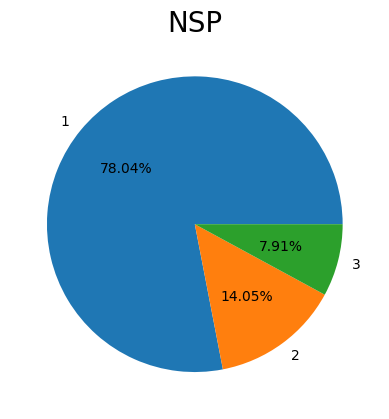

In [ ]:
plt.title('NSP',size=20)
plt.pie(data['NSP'].value_counts(),autopct='%.2f%%',labels=['1','2','3'])
plt.show()

In [ ]:
data['NSP'].value_counts()

NSP
1.0    1628
2.0     293
3.0     165
Name: count, dtype: int64

In [ ]:
plt.colormaps

Text(0.5, 1.0, 'Correlation Heatmap')

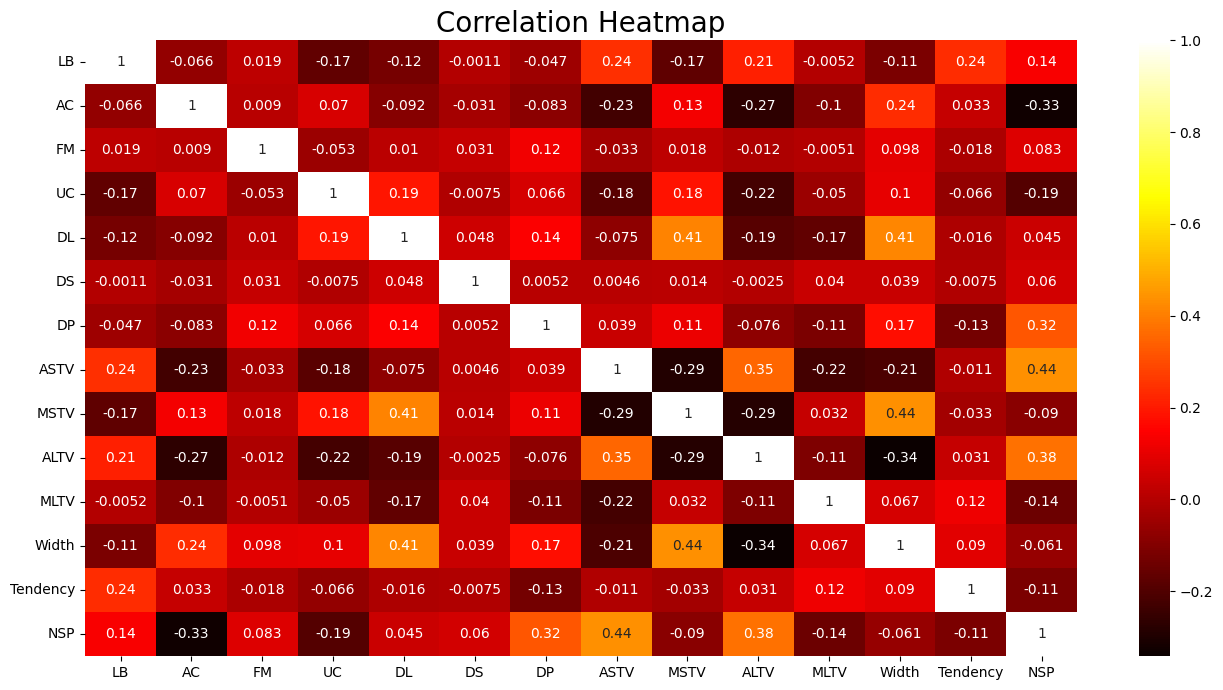

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap='hot')
plt.title('Correlation Heatmap',size=20)

In [ ]:
c_mat = pd.DataFrame(data.corr().unstack().reset_index())
c_mat = c_mat.sort_values(by=0,ascending=False)
c_mat = c_mat.iloc[14:]
c_mat.columns = ['Feature1','Feature2','Correlation']

In [ ]:
# TOP 10 Positive Correlations
c_mat.head(20)

,Feature1,Feature2,Correlation
189,NSP,ASTV,0.437029
111,ASTV,NSP,0.437029
162,Width,MSTV,0.435167
123,MSTV,Width,0.435167
158,Width,DL,0.414272
67,DL,Width,0.414272
64,DL,MSTV,0.410541
116,MSTV,DL,0.410541
191,NSP,ALTV,0.375989
139,ALTV,NSP,0.375989


In [ ]:
#TOP 10 Negative Correlations
c_mat.tail(20)

,Feature1,Feature2,Correlation
185,NSP,UC,-0.191213
55,UC,NSP,-0.191213
109,ASTV,Width,-0.207671
161,Width,ASTV,-0.207671
51,UC,ALTV,-0.223594
129,ALTV,UC,-0.223594
108,ASTV,MLTV,-0.224086
147,MLTV,ASTV,-0.224086
99,ASTV,AC,-0.229301
21,AC,ASTV,-0.229301


In [ ]:
data.corr().unstack().max()

1.0

<Axes: >

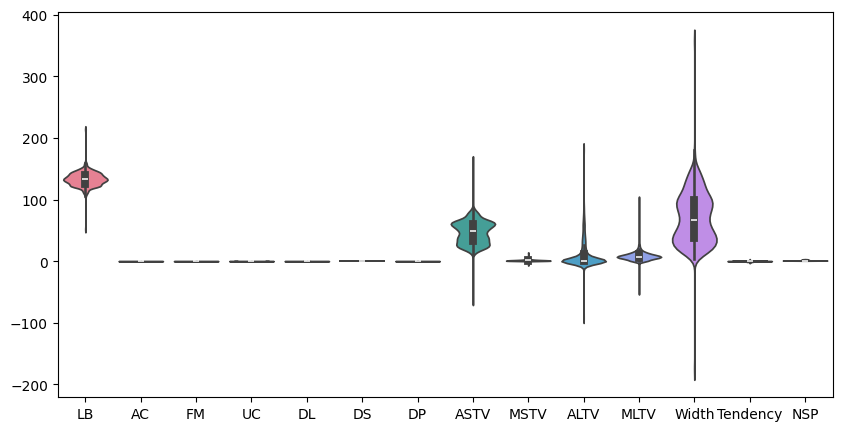

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data)

# 4. INSIGHTS
---
1. Positive Correlation :
  * No variables are ***strongly correlated (0.8 - 1)*** to each other.
  * MSTV and DL are also Strongly correlated to Width .
  * We can see that NSP and ASTV  are ***moderately correlated (0.60-0.79)**
  * Abnormal short-term variability (ALTV) is very ***weakly correlated(0.20 -0.39)***  with both NSP and ASTV.
2. Negative Correlations:
  * NSP is inversely related to UC .
  * ASTV tend to decrease as width increases.
  * ALTV shows a negative association with UC.
  * Mean long-term variability (MLTV) and mean short-term variability (MSTV) are negatively correlated with ASTV.
  * AC has an inverse relationship with both ALTV and NSP.
3. From the data we can infer that the categorical COlumn i.e NSP can be used as a target variable for Machine learning model.
4. Rest of the columns can be used as features.